# Chapter 10 code problems

### Perceptron

In [1]:

from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(int)

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

### Tensorflow

In [2]:
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

2023-11-07 13:40:15.851633: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[3]]

'Ankle boot'

In [5]:
# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28,28]))
# model.add(keras.layers.Dense(300, activation='relu'))
# model.add(keras.layers.Dense(100, activation='relu'))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
]
)


In [6]:
model.compile(
    loss=keras.losses.sparse_categorical_crossentropy,
    optimizer=keras.optimizers.SGD(),
    metrics=["accuracy"]

)

In [7]:
import os

root_logdir = os.path.join(os.curdir, "my_logs")


def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)


run_log_dir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_log_dir)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7147 - accuracy: 0.7651 - val_loss: 0.5030 - val_accuracy: 0.8340
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4879 - accuracy: 0.8297 - val_loss: 0.4729 - val_accuracy: 0.8400
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4439 - accuracy: 0.8452 - val_loss: 0.4330 - val_accuracy: 0.8546
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4170 - accuracy: 0.8537 - val_loss: 0.3982 - val_accuracy: 0.8656
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3967 - accuracy: 0.8595 - val_loss: 0.3891 - val_accuracy: 0.8642
Epoch 6/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3815 - accuracy: 0.8653 - val_loss: 0.4142 - val_accuracy: 0.8580
Epoch 7/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3666 - accuracy: 0.8714 - val_loss: 0.3649 - val_accuracy:

/Users/noble/Documents/GitHub/Hands-on-ml/venv/lib/python3.10/site-packages/matplotlib/_tight_bbox.py:67: RuntimeWarning: divide by zero encountered in scalar divide
  fig.patch.set_bounds(x0 / w1, y0 / h1,
/Users/noble/Documents/GitHub/Hands-on-ml/venv/lib/python3.10/site-packages/matplotlib/_tight_bbox.py:68: RuntimeWarning: divide by zero encountered in scalar divide
  fig.bbox.width / w1, fig.bbox.height / h1)
/Users/noble/Documents/GitHub/Hands-on-ml/venv/lib/python3.10/site-packages/matplotlib/patches.py:742: RuntimeWarning: invalid value encountered in scalar add
  x1 = self.convert_xunits(self._x0 + self._width)
/Users/noble/Documents/GitHub/Hands-on-ml/venv/lib/python3.10/site-packages/matplotlib/transforms.py:2038: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[0, 2] += tx


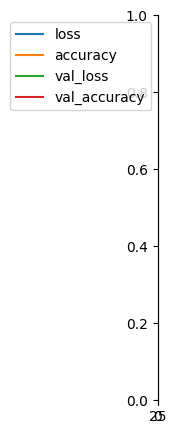

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(0, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()